<a target="_blank" href="https://colab.research.google.com/github/nascarsayan/diy-python/blob/master/freecodecamp_data_analysis.ipynbb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

[Original Reference](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas)

# IPL  Cricket Data


Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. The league was founded by Board of Control for Cricket India (BCCI) in 2008. There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season.

The dataset has been downloaded from [Kaggle Dataset](https://www.kaggle.com/nowke9/ipldata). The dataset contains two csv files but only one csv file i.e matches.csv has been used in this project for the analysis. The libraries for data analysis and visualization used in this project are Numpy, Pandas, Matplotlib and Seaborn. These libraries are covered in the course by  [Jovian.ml](https://jovian.ml) named as [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas).

In [1]:
project_name = "Cricket-Data-analysis" # change this

In [6]:
%pip install opendatasets -q
%pip install jovian -q
%pip install cryptography -q
%pip install seaborn matplotlib numpy pandas -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from collections import Counter
%matplotlib inline

In [22]:
import base64
import os
import json
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC

def saveKaggleCreds():
    if os.path.exists("./kaggle.json"):
        print("Kaggle credentials already saved")
        return
    password = input("Enter password: ").encode()
    salt = b''
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=390000,
    )
    key = base64.urlsafe_b64encode(kdf.derive(password))
    f = Fernet(key)
    kaggle_api_key_enc = b'gAAAAABmvDSJeTFhgAq8FLb2lC9Gw0z80u9aFXAjmAsV9s0oCumnJPtBhJH9Y989l1OwaDOLChzfAe8yCpAArvyUABegXb1J_n_4k_rbvUOjIi36XGiU6Itp9O7fJE23sDbuueCbevSJ'
    kaggle_username_enc = b'gAAAAABmvDTQOsJiolX7VBW448ixOmkAC9FSzDLpllgv2AIURfAT6ZUNSuRV6UcwLazl4i2PrCpK3y47LYxCtiUWYu7fOR4i_g=='
    kaggle_api_key = f.decrypt(kaggle_api_key_enc).decode("utf-8")
    kaggle_username = f.decrypt(kaggle_username_enc).decode("utf-8")
    kaggle_json = {"username": kaggle_username, "key": kaggle_api_key}
    with open("./kaggle.json", "w") as file:
        print("Saving Kaggle credentials")
        json.dump(kaggle_json, file)

saveKaggleCreds()

Saving Kaggle credentials


## Downloading the Dataset

**TODO** - add some explanation here

In [25]:
import os
if not (os.path.isfile('./ipldata/matches.csv') and os.path.isfile('./ipldata/deliveries.csv')):
    print("File not present Downloading Files.....")
    dataset_url = 'https://www.kaggle.com/nowke9/ipldata'
    od.download(dataset_url)
else:
    print("File Present in Directory skipping the download.")

File not present Downloading Files.....
Dataset URL: https://www.kaggle.com/datasets/nowke9/ipldata


100%|██████████| 1.20M/1.20M [00:01<00:00, 928kB/s]

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

# Loading DataSet

> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [26]:
# Importing the matches.csv into a pandas dataframe
ipl_df = pd.read_csv('ipldata/matches.csv')
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [27]:
ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
deliveries_df = pd.read_csv('ipldata/deliveries.csv')
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Data Cleaning

In [ ]:
ipl_matches_df = ipl_df.copy()

In [ ]:
ipl_matches_df.shape

(756, 18)

In [ ]:
print("UMPRIE 3 Describe rows count :",ipl_matches_df['umpire3'].describe()['count'])

UMPRIE 3 Describe rows count : 119


'''
We see that Umpire data is irrevelant

'''

In [ ]:
ipl_matches_df = ipl_matches_df.drop(['umpire3','city'],axis=1)
ipl_matches_df

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [ ]:
ipl_matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
dtypes: int64(5), object(11)
memory usage: 94.6+ KB


In [ ]:
ipl_matches_df['date'] = pd.to_datetime(ipl_matches_df['date'])

Checking after converting date into date time

In [ ]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           752 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  752 non-null    object        
 13  venue            756 non-null    object        
 14  umpire1          754 non-null    object   

In [ ]:
ipl_matches_df



,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [ ]:
ipl_matches_df['season'] = ipl_matches_df['season'].apply(lambda x: int(str(x)[-4:]))


In [ ]:
ipl_matches_df

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [ ]:
# Let's Check our matches dataframe
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           752 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  752 non-null    object        
 13  venue            756 non-null    object        
 14  umpire1          754 non-null    object   

## Data preparation for Deliveries

In [ ]:
deliveries_df = deliveries_df.copy()
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
# Let us first remove all the rows with is_super_over = 1 we can see there are only 81 rows with the specific condition.
print("Number of rows having super_over as 1 :",sum(deliveries_df.is_super_over == 1))

Number of rows having super_over as 1 : 81


#### Removing Superover rows

In [ ]:
deliveries_df = deliveries_df[deliveries_df.is_super_over != 1]

In [ ]:
columns_to_remove = ['non_striker','wide_runs','is_super_over','bye_runs','legbye_runs','noball_runs','penalty_runs']

In [ ]:
deliveries_df = deliveries_df.drop(columns_to_remove,axis=1)

In [ ]:
deliveries_df[deliveries_df['inning'] == 5]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167189,11146,5,Kolkata Knight Riders,Delhi Capitals,1,1,AD Russell,K Rabada,4,0,4,NaN,NaN,NaN
167190,11146,5,Kolkata Knight Riders,Delhi Capitals,1,2,AD Russell,K Rabada,0,0,0,NaN,NaN,NaN
167191,11146,5,Kolkata Knight Riders,Delhi Capitals,1,4,RV Uthappa,K Rabada,1,0,1,NaN,NaN,NaN
167192,11146,5,Kolkata Knight Riders,Delhi Capitals,1,5,KD Karthik,K Rabada,1,0,1,NaN,NaN,NaN
167193,11146,5,Kolkata Knight Riders,Delhi Capitals,1,6,RV Uthappa,K Rabada,1,0,1,NaN,NaN,NaN
176932,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,1,HH Pandya,Rashid Khan,6,0,6,NaN,NaN,NaN
176933,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,2,HH Pandya,Rashid Khan,1,0,1,NaN,NaN,NaN
176934,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,3,KA Pollard,Rashid Khan,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_df[deliveries_df['inning'] == 3]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167184,11146,3,Delhi Capitals,Kolkata Knight Riders,1,1,RR Pant,P Krishna,1,0,1,NaN,NaN,NaN
167185,11146,3,Delhi Capitals,Kolkata Knight Riders,1,2,SS Iyer,P Krishna,4,0,4,NaN,NaN,NaN
167186,11146,3,Delhi Capitals,Kolkata Knight Riders,1,4,RR Pant,P Krishna,2,0,2,NaN,NaN,NaN
167187,11146,3,Delhi Capitals,Kolkata Knight Riders,1,5,RR Pant,P Krishna,2,0,2,NaN,NaN,NaN
167188,11146,3,Delhi Capitals,Kolkata Knight Riders,1,6,RR Pant,P Krishna,1,0,1,NaN,NaN,NaN
176930,11342,3,Sunrisers Hyderabad,Mumbai Indians,1,2,MJ Guptill,JJ Bumrah,1,0,1,NaN,NaN,NaN
176931,11342,3,Sunrisers Hyderabad,Mumbai Indians,1,3,Mohammad Nabi,JJ Bumrah,6,0,6,NaN,NaN,NaN


As we see the innings 3 and 5 may be error in data entry and there are too less rows having innings as 3 and 5, we will be removing t

In [ ]:
deliveries_df = deliveries_df[deliveries_df['inning'] != 5]
deliveries_df = deliveries_df[deliveries_df['inning'] != 3]

In [ ]:
# Checking the Unique values in inning column
deliveries_df.inning.unique()

array([1, 2])

In [ ]:
# # For easy interpretation of our data lets add the season column in our deliveries_df dataset from ipl_matches_df
# # But we can see there are no common column names while the column id and match_id matches respectively
# # Lets rename the match_id column as id first to merge the two dataset
# deliveries_df.rename(columns = {'match_id':'id'},inplace=True)
deliveries_df

In [ ]:
deliveries_df = pd.merge(deliveries_df,ipl_matches_df[{'id','season'}],left_on = 'match_id',right_on='id')

In [ ]:
deliveries_df.drop('id', inplace=True, axis=1)
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,NaN,NaN,NaN,2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,NaN,NaN,NaN,2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,4,0,4,NaN,NaN,NaN,2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,NaN,NaN,NaN,2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,2,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SL Malinga,1,0,1,NaN,NaN,NaN,2019
178978,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,SL Malinga,2,0,2,NaN,NaN,NaN,2019
178979,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,SL Malinga,1,0,1,SR Watson,run out,KH Pandya,2019
178980,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,SL Malinga,2,0,2,NaN,NaN,NaN,2019


 Data Frame having total runs per team per innings.

In [ ]:
unique_matches = deliveries_df.match_id.unique()
unique_matches

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [ ]:
class Process():
    team_runs_df = pd.DataFrame(columns = ['match_id','inning','team_name','extra_runs','total_runs','players_dismissed'])
    def __init__(self,unique_matches,deliveries_df):
        self.unique = unique_matches
        self.df = deliveries_df
        self.create_df()

    def create_df(self):
        for m_id in self.unique:
            if m_id in self.team_runs_df["match_id"]:
                temp = self.team_runs_df[self.team_runs_df["match_id"] == m_id].inning
                if 1 in temp and 0 in temp:
                    continue
            match_df = self.df[self.df['match_id'] == m_id].copy()
            team1 = match_df[match_df['inning'] == 1].copy()
            team2 = match_df[match_df['inning'] == 2].copy()
            i=0
            for team in team1,team2:
                runs = team['total_runs'].sum()
                wickets = team['player_dismissed'].notnull().sum()
                extras = team['extra_runs'].sum()
                te = team.batting_team.unique()
                if len(te) > 0:
                    te = te[0]
                df2 = {'match_id': m_id,'inning' : i+1,'team_name' : te,'extra_runs' : extras ,'total_runs' : runs,'players_dismissed' : wickets}
                i+=1
                self.team_runs_df = self.team_runs_df.append(df2,ignore_index = True)

    def get_team_stats(self):
        return self.team_runs_df

In [ ]:
obj = Process(unique_matches,deliveries_df)
team_stats_df = obj.get_team_stats()

In [ ]:
team_stats_df

,match_id,inning,team_name,extra_runs,total_runs,players_dismissed
0,1,1,Sunrisers Hyderabad,7,207,4
1,1,2,Royal Challengers Bangalore,6,172,10
2,2,1,Mumbai Indians,8,184,8
3,2,2,Rising Pune Supergiant,4,187,3
4,3,1,Gujarat Lions,4,183,4
...,...,...,...,...,...,...
1507,11413,2,Delhi Capitals,5,170,7
1508,11414,1,Delhi Capitals,8,155,9
1509,11414,2,Chennai Super Kings,11,162,4
1510,11415,1,Mumbai Indians,3,152,8


In [ ]:
team_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           1512 non-null   object
 1   inning             1512 non-null   object
 2   team_name          1512 non-null   object
 3   extra_runs         1512 non-null   object
 4   total_runs         1512 non-null   object
 5   players_dismissed  1512 non-null   object
dtypes: object(6)
memory usage: 71.0+ KB


In [ ]:
# We need to convert match_id,inning,extra_runs,total_runs and players_dismissed to int64 dtype
team_stats_df = team_stats_df.astype({"match_id":int,'inning':int,'extra_runs':int,'total_runs':int,'players_dismissed':int})

In [ ]:
team_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           1512 non-null   int64 
 1   inning             1512 non-null   int64 
 2   team_name          1512 non-null   object
 3   extra_runs         1512 non-null   int64 
 4   total_runs         1512 non-null   int64 
 5   players_dismissed  1512 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 71.0+ KB


In [ ]:
# Copying our dataframe into a CSV file Team_stats.csv
team_stats_df.to_csv("Team_stats.csv")

Making a dataframe of batsman having all players name , total runs, average runs, balls played, dismissal and strike rate of each players.

In [ ]:
players = deliveries_df.batsman.unique()
players

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [ ]:
class Batsman():
    batsman_df = pd.DataFrame(columns=['player_name','total_runs','outs','balls_played','average_runs','strike_rate'])
    def __init__(self,players,deliveries_df):
        self.players = players
        self.df = deliveries_df.copy()

    def create_df(self):
        for player in self.players:
            run = int(self.df[self.df["batsman"] == player].batsman_runs.sum())
            balls = int((self.df["batsman"] == player).sum())
            #print(balls)
            out = int((self.df["player_dismissed"] == player).sum())
            try:
                avg_run = run/out # average runs = Total runs divided by total outs
            except:
                avg_run = 0
            try:
                strk_rate = (run * 100)/balls # strike rate = run scored per 100 balls
            except:
                strk_rate = 0
            df2 = {'player_name':player,'total_runs': int(run),'outs':int(out),'balls_played': int(balls),'average_runs':avg_run,'strike_rate': strk_rate}
            self.batsman_df = self.batsman_df.append(df2,ignore_index =True)
        return self.batsman_df

In [ ]:
# Let us use the raw df for this dataframe as some values might be missing if the raw df is not used.
batsman_df = Batsman(players,deliveries_df).create_df()

In [ ]:
batsman_df

,player_name,total_runs,outs,balls_played,average_runs,strike_rate
0,DA Warner,4741,109,3397,43.495413,139.564321
1,S Dhawan,4632,137,3776,33.810219,122.669492
2,MC Henriques,969,34,769,28.500000,126.007802
3,Yuvraj Singh,2761,111,2205,24.873874,125.215420
4,DJ Hooda,535,35,431,15.285714,124.129930
...,...,...,...,...,...,...
511,A Turner,4,3,11,1.333333,36.363636
512,H Brar,22,0,14,0.000000,157.142857
513,S Rutherford,82,5,55,16.400000,149.090909
514,P Raj,0,0,1,0.000000,0.000000


In [ ]:
batsman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_name   516 non-null    object 
 1   total_runs    516 non-null    object 
 2   outs          516 non-null    object 
 3   balls_played  516 non-null    object 
 4   average_runs  516 non-null    float64
 5   strike_rate   516 non-null    float64
dtypes: float64(2), object(4)
memory usage: 24.3+ KB


We can see that total_runs,outs,balls_played column is not integer type , so lets convert it to integer first

In [ ]:
batsman_df = batsman_df.astype({'total_runs':int,'outs':int,"balls_played":int})
batsman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_name   516 non-null    object 
 1   total_runs    516 non-null    int64  
 2   outs          516 non-null    int64  
 3   balls_played  516 non-null    int64  
 4   average_runs  516 non-null    float64
 5   strike_rate   516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
# Let's Choose a Player Name and see his stats (say 'V Kohli')
batsman_df[batsman_df.player_name == 'S Dhawan']

,player_name,total_runs,outs,balls_played,average_runs,strike_rate
1,S Dhawan,4632,137,3776,33.810219,122.669492


In [ ]:
# Saving the dataframe into a .csv file (say player_batting_stats.csv) For future reference
batsman_df.to_csv("Player_batting_stats.csv")

Here comes the end of our Processing of Data, we have done seen two raw tables matches and deliveries from where we have extracted the data , processed it and formed four new processed dataframe `matches_df`, `deliveries_df`,`team_stats_df` and `batsman_df`

### Exploratory Analysis and Visualization
####  Batting

Top 10 players with highest average runs.
Top 10 players with highest strike rates.
Top 10 players in the basis of runs scored till IPL 2019.
Bowling

Most balls bowled per season/Year.
Top 10 highest wicket Taker of all time.
Umpire

Most used on-field umpire Per Season.
Team Management

Top 10 most used Stadium.
No. of times each team have won a IPL Season.

#### Batting

In cricket batting is the act or skill of hitting the ball to score runs or to prevent from getting a wicket. Any player who is standing in the pitch and facing the bowler is considered to be a batsman. Let us get some visualization and analyzation of the best batsman charts in IPL 2008-2019.

### Top 10 players with highest Average Runs.
To Visualize the top players with highest average runs we can use a bar graph. We will use the dataframe we previously made batsman_df to visualize this graph.

In [ ]:
top_ten_avg_score = batsman_df.sort_values("average_runs",ascending = False).head(10)
top_ten_avg_score

,player_name,total_runs,outs,balls_played,average_runs,strike_rate
490,J Bairstow,468,8,293,58.500000,159.726962
281,MN van Wyk,167,3,135,55.666667,123.703704
326,AC Voges,181,4,143,45.250000,126.573427
40,HM Amla,577,13,418,44.384615,138.038278
47,Iqbal Abdulla,88,2,86,44.000000,102.325581
0,DA Warner,4741,109,3397,43.495413,139.564321
419,KL Rahul,2013,47,1465,42.829787,137.406143
30,MS Dhoni,4477,105,3318,42.638095,134.930681
6,CH Gayle,4535,108,3119,41.990741,145.399166
334,PD Collingwood,203,5,159,40.600000,127.672956


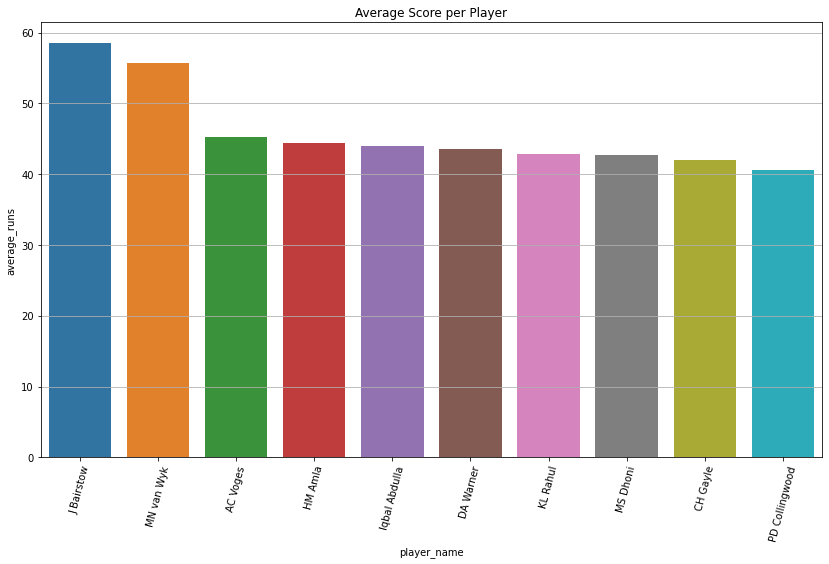

In [ ]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.xticks(rotation=75)
plt.title("Average Score per Player")
sns.barplot(x=top_ten_avg_score.player_name, y=top_ten_avg_score.average_runs);

Formulae to calculate Average run is:

Average Score = Total_Runs_Scored / Total_times_Dismissed

We can observe the average runs of J Bairstow and MN van Wynk is higher and is nearly 55 while the others have an average score of nearly 45. Therfore we can assume that that these are the players stays in field for a longer time without getting dismissed and can help holding the wicket for a team.

But to draw a conclusion from the above graph we need to consider the number of balls played, if a player have played too less matches his avg runs might be more then the players who deserved to be at the top spot, to really see whether a player a consistent with his average score let us consider all players who have at least played 30 overs(180 balls). We are selecting 30 overs assuming a consistent player gets to play atleast 30 overs even if he plays for just one season.

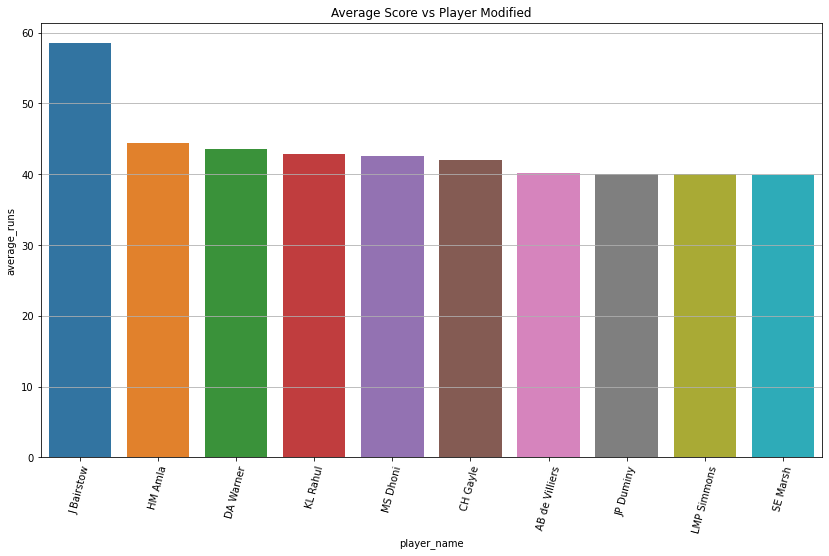

In [ ]:
top_ten_avg_score = batsman_df[batsman_df.balls_played >= 180].sort_values("average_runs",ascending = False).head(10)
plt.figure(figsize=(14,8))
plt.grid(True)
plt.xticks(rotation=75)
plt.title("Average Score vs Player Modified")
sns.barplot(x=top_ten_avg_score.player_name, y=top_ten_avg_score.average_runs);

Even in this graph we can see `J Bairstow` retains the top spot so we can say that he is a player who is good at holding the wicket and in T-20 format an average score 55+ is considered as very good avg runs, Also from the above table we can see that he has played for only 293 balls this show that he has not played a lot of matches in IPL.

#### Top 10 players with highest Strike Rate
Strike Rate shows the real performance of a batsman in T20 format as for only 20 overs holding the wicket is not the only option for batsman , one have to keep up the scoreboard to give a good Competition to the team.

Strike Rate is Total Runs per 100 balls played i.e : _Strike Rate = (Runs * 100) / Total_Balls_played_

In [ ]:
# Lets check out the first 5 values first
top_strk_rate = batsman_df.sort_values("strike_rate",ascending = False).head(5)
top_strk_rate

,player_name,total_runs,outs,balls_played,average_runs,strike_rate
468,B Stanlake,5,0,2,0.000000,250.000000
220,Umar Gul,39,3,19,13.000000,205.263158
502,S Sharma,8,0,4,0.000000,200.000000
340,RS Sodhi,4,0,2,0.000000,200.000000
407,AD Russell,1441,42,801,34.309524,179.900125


From this table we can see that players who have managed to made some score without playing a lot of balls got the highest strike rates, even though mathematically the data is correct logically it would be unfair to consider the player who have not played a lot and got good stike rate.

_To watch the trend how the strike rate varies with number of balls played lets plot a scatter plot._

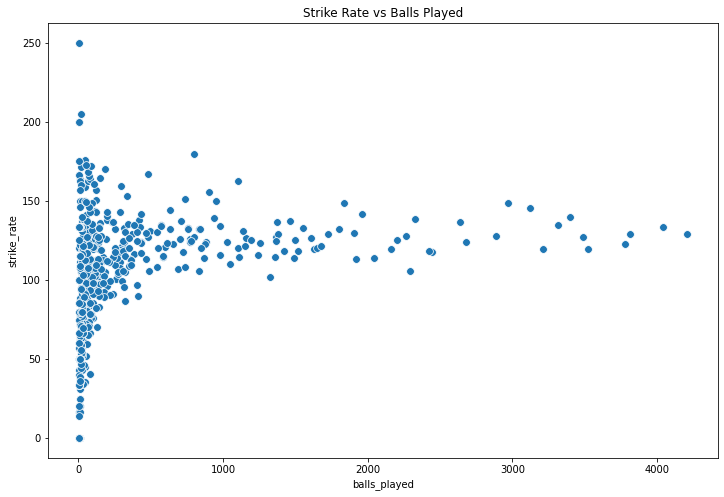

In [ ]:
plt.figure(figsize=(12,8 ))
plt.title('Strike Rate vs Balls Played')

sns.scatterplot(x=batsman_df.balls_played,
                y=batsman_df.strike_rate,
                s=60
               );

From the above graph we can see that for more numbers of ball played the srike rate of players tends to remains in the range 130 - 150 and varies a lot when the number of balls played is too less. This shows when players plays a lot of matches the strike rates gets fixed near a nearly constant value. To see the top players with best strike rates we will see only those players who have played at least 300 balls(50 overs).

<AxesSubplot:title={'center':'Strike Rate per Player'}, xlabel='player_name', ylabel='strike_rate'>

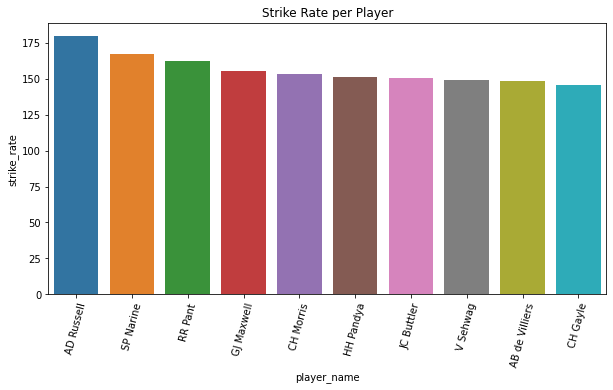

In [ ]:
top_strk_rate = batsman_df[batsman_df.balls_played >=300].sort_values("strike_rate",ascending = False).head(10)
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title("Strike Rate per Player")
sns.barplot(x=top_strk_rate.player_name, y=top_strk_rate.strike_rate)

#### Top 10 players in the basis of runs scored till IPL 2019
Let us plot a bar graph of Total_Runs vs Player and see the result.

In [ ]:
highest_run = batsman_df.sort_values('total_runs',ascending = False).head(10)
highest_run

,player_name,total_runs,outs,balls_played,average_runs,strike_rate
87,V Kohli,5429,143,4209,37.965035,128.985507
33,SK Raina,5407,161,4041,33.583851,133.803514
19,RG Sharma,4914,155,3816,31.703226,128.773585
0,DA Warner,4741,109,3397,43.495413,139.564321
1,S Dhawan,4632,137,3776,33.810219,122.669492
6,CH Gayle,4535,108,3119,41.990741,145.399166
30,MS Dhoni,4477,105,3318,42.638095,134.930681
64,RV Uthappa,4444,153,3490,29.045752,127.335244
71,AB de Villiers,4415,110,2973,40.136364,148.503195
36,G Gambhir,4223,136,3524,31.051471,119.835414


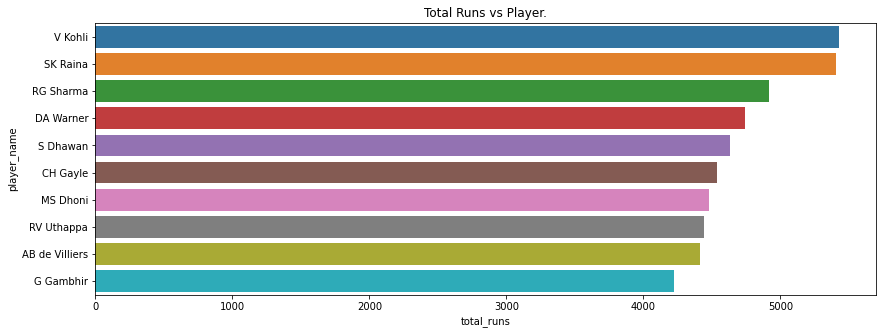

In [ ]:
plt.figure(figsize= (14,5))
plt.title("Total Runs vs Player.")
sns.barplot(x=highest_run.total_runs,y=highest_run.player_name);

We can see that all the players in this list has a good total runs of more than 4000 with `V Kohli` and `SK Raina`  having a total runs near to 5500 which is a great total , this plot can help us visualize the best player scores of all time in IPL.

## Asking and Answering Questions

### Questions
1. Does Winning the toss plays a role in winning the match?
2. What are the most common types of dismissals?
3. Which team has won most matches of IPL till now?
4. Do the teams with highest win counts also tops in the chart of highest win percentage?
5. Does Batting first/Fielding first helps a team to win when DL is applied?
6. Which Stadiums are suited for batting, balling or has a neutral pitch?
7. Does giving more extra runs effects in the result of the game?
8. Who won the orange Cap Award and Purple Cap Award each Year?
9. Who are the top 5 Umpires to look over matches in IPL?

### Q. Does Winning toss plays a role in winning the match?

Let's answer this question by observing the dataframe ipl_matches_df. We will compare how many team won after winning toss and how many teams lost after winning the toss.


In [ ]:
won= 0
lost=0
for ind in ipl_matches_df.index:
    if ipl_matches_df['toss_winner'][ind] == ipl_matches_df['winner'][ind]:
        won+=1
    else:
        lost+=1

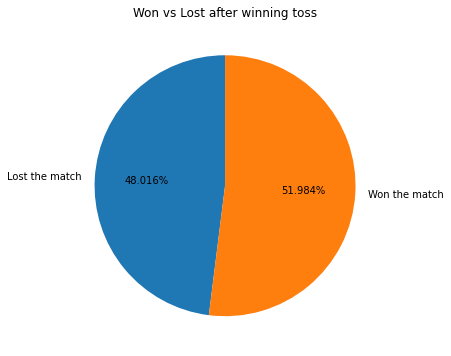

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Won vs Lost after winning toss")
plt.pie((lost,won), labels=("Lost the match","Won the match"), autopct='%1.3f%%', startangle=90);

From the above pie chart we can see that toss does play a little factor but thats not enough to win a match for a team, other factors like players form, venue, pitch conditions, humidity etc. can also lead to win or defeat a team.

### Q. What are the most common types of dismissals?


In [ ]:
# Lets observe the unique datas in dismissal_kind column
deliveries_df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
# To get our answer we will first remove all the null values and save the rest in a variable
demo_df = deliveries_df[deliveries_df.dismissal_kind.notnull()]
demo_df.dismissal_kind.unique()

array(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

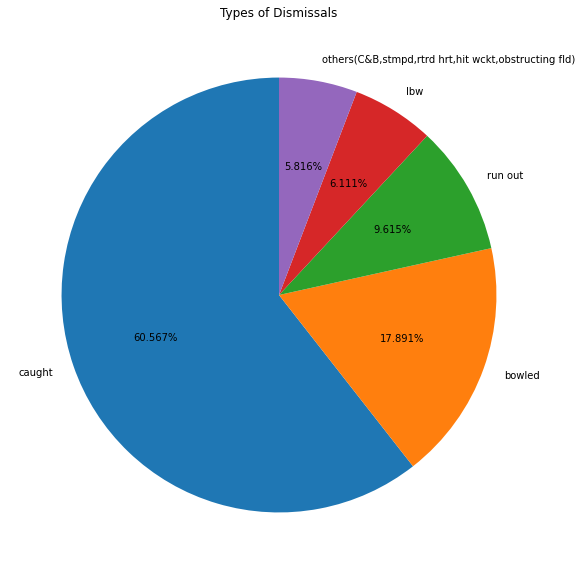

In [ ]:
# Now lets run the  code to observe our desired answer.
di = dict(Counter(demo_df.dismissal_kind))
to_rem = list()
other = 0
for item in di.keys():
    if di[item] <=300:
        other += di[item]
        to_rem.append(item)
di["others(C&B,stmpd,rtrd hrt,hit wckt,obstructing fld)"] = other
for i in to_rem:
    di.pop(i)
plt.figure(figsize=(14,10))
plt.title("Types of Dismissals")
plt.pie(di.values(), labels=di.keys(), autopct='%1.3f%%', startangle=90);

From the above chart we can see the most common types of dismissals are `caught`,`bowled`,`run out` and `lbw`. All of these has a chance of nearly 95% and `CATCH OUT` being the most common type of dismissal among them. Approximately 6 out of every 10 Batsmen gets dismissed by type Catch out. There is only 5 % chance of getting a player dismissed by hit wicket, stumped, obstructing the field, Caught and Bowled and retired hurt(others).

### Q. Which team has won most matches of IPL till now?

Before we saw who won most IPL seasons, now we will see the stats of which teams have won most match for the last 12 seasons. Though winning an IPL season cup is the biggest achievement for a team but winning most matches can also give us an idea about how good a team is, aren't you eager to know if its your favourite team on not? Let's Check





In [ ]:
resulted_matches = ipl_matches_df[ipl_matches_df.result != "tie"].copy() #Omitting the tied matches
most_win = pd.DataFrame(columns = {"Team Name","NO. Of Wins"})
teams = dict(Counter(resulted_matches[resulted_matches.winner.notnull()].winner))
for i,v in teams.items():
    most_win=most_win.append({"Team Name":i,"NO. Of Wins":v},ignore_index=True)
most_win.sort_values("NO. Of Wins",ascending = False,inplace = True)
most_win.reset_index()[["Team Name","NO. Of Wins"]].head(5)

,Team Name,NO. Of Wins
0,Mumbai Indians,107
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,83
4,Kings XI Punjab,80


We can see that both __Mumbai Indians__ won most number of matches with a total winning count of 107. __Chennai Super Kings__ (100 wins) is in the 2nd spot with respect to winnning matches followed by __Kolkata Knight Riders__ (92 wins).
It's not surprising though because these are the teams who have won 4,3 and 2 ipl Seasons respectively. But in the 4th spot we see __Royal Challengers Bangalore__ which is preety surprising given the fact that they have never won any IPL seasons. This chart gives us an idea about why _RCB_ have a big fanbase inspite of never winning a single IPL Season.

The above Table gives us an idea of how many matches each team has won in total but to get an idea of how well a team plays we have to compare how many matches each team has won vs total matches played which gives us an idea of the win ratio/win percentage of each team and is a more better way to compare the ability of a team. That brings us to our next Question.

### Q. Do the teams with highest win counts also tops in the chart of highest win percentage?


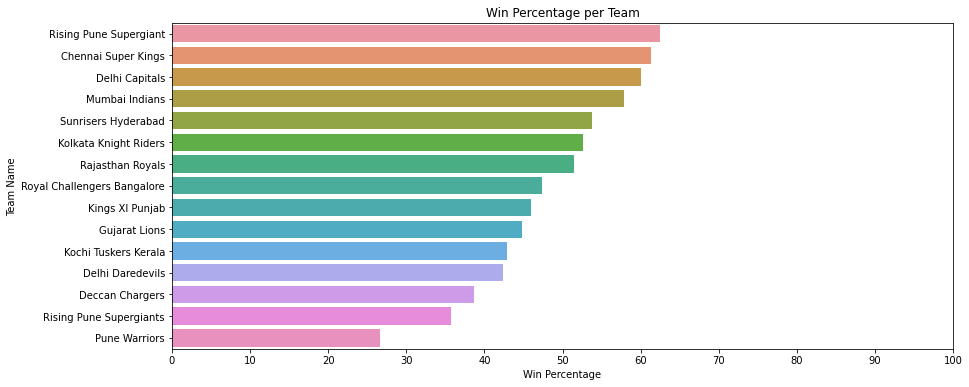

In [ ]:
resulted_matches = resulted_matches[resulted_matches.result != "no result"].copy() # Omitting the matches with no results
teams_play_count = dict(Counter(resulted_matches.team1)+Counter(resulted_matches.team2)) #total matches played by a team
teams = dict(Counter(resulted_matches[resulted_matches.winner.notnull()].winner)) # total wins per team
for team in teams:
    teams[team] = round((teams[team]*100)/teams_play_count[team],2)
win_percentage = pd.DataFrame(columns = {"Team Name","Win Percentage"})
for i,v in teams.items():
    win_percentage=win_percentage.append({"Team Name":i,"Win Percentage":v},ignore_index=True)
win_percentage.sort_values("Win Percentage",ascending = False,inplace = True)
plt.figure(figsize= (14,6))
plt.title("Win Percentage per Team")
plt.xticks(range(0,101,10))
sns.barplot(y= win_percentage["Team Name"] , x = win_percentage["Win Percentage"]).set(xlim = (0,100));

From the graph we can see the highest win percentage is of the team `Rising Pune Supergiant` while `Chennai Super ` and `Mumbai Indians` still belongs in one of the top 5 teams in Win Percentage Table.

### Q. Does Batting first/Fielding first helps a team to win when DL is applied?

D/L or the Duckworth–Lewis–Stern method is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match interrupted by weather or other circumstances. The method was devised by two English statisticians, Frank Duckworth and Tony Lewis, and was formerly known as the Duckworth–Lewis method (D/L). It was introduced in 1997, and adopted officially by the ICC in 1999. After the retirements of Duckworth and Lewis, Professor Steven Stern became the custodian of the method and it was renamed to its current title in November 2014. Click here [Wikipedia](https://en.wikipedia.org/wiki/Duckworth–Lewis–Stern_method) to know about D/L method.


In [ ]:
fielding_first_won = 0
batting_first_won = 0
dl_matches = ipl_matches_df[ipl_matches_df.dl_applied == 1].copy()

# First lets choose those teams who won toss and chose fielding first and won the game
fielding_first_teams = dl_matches[dl_matches.toss_decision == "field"]
fielding_first_teams.reset_index(inplace=True)
for i in range(len(fielding_first_teams)):
    # We will check if a team fielding first won or not
    if fielding_first_teams["toss_winner"][i] == fielding_first_teams["winner"][i]:
        fielding_first_won+=1
    else:
        batting_first_won+=1 # The maches in which a team did not won after choosing fielding first are the matches when batting first team won

#Similarly we will do the same process for batting first teams
batting_first_teams = dl_matches[dl_matches.toss_decision == "bat"]
batting_first_teams.reset_index(inplace=True)
for i in range(len(batting_first_teams)):
    # We will check if a team fielding first won or not
    if batting_first_teams["toss_winner"][i] == batting_first_teams["winner"][i]:
        batting_first_won+=1 # The matches in which a team chose to bat first
    else:
        fielding_first_won+=1 # The matches in which a team chose to bat first but lost in those fielding first teams won
print("Total Matches in which D/L are applied in IPL till now :",len(dl_matches))

Total Matches in which D/L are applied in IPL till now : 19


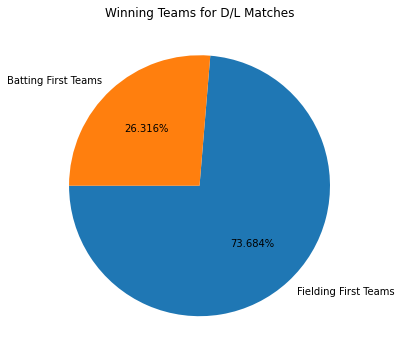

In [ ]:
# Now let's plot and see the resuts
plt.figure(figsize=(6,6))
plt.title("Winning Teams for D/L Matches")
plt.pie((fielding_first_won,batting_first_won),labels=("Fielding First Teams","Batting First Teams"),autopct='%1.3f%%',startangle = 180);

From the above pie chart we can see that team who chose or got _Fielding first_ or the chasing team has a clear advantage of winning on the days when DL's are applied.


### Q. Which Stadiums are suited for batting, bowling or has a neutral pitch?



In [ ]:
team_stats_df.describe()

,match_id,inning,extra_runs,total_runs,players_dismissed
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,1792.178571,1.500000,7.932540,155.478836,5.833333
std,3463.331539,0.500165,4.235546,32.483497,2.473152
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,189.750000,1.000000,5.000000,136.000000,4.000000
50%,378.500000,1.500000,7.000000,158.000000,6.000000
75%,567.250000,2.000000,10.000000,178.000000,8.000000
max,11415.000000,2.000000,28.000000,263.000000,10.000000


From the above data we can see the average score of every team in IPL till now 2019 is 155.47. For our observation we will consider any ground who has average score more than 160 can be treated as Batting pitch, average score less than 145 will be treated as Balling Pitch and the rest as Neutral.

For our observation at first we will add the venue column to the above table team_stats_df.

In [ ]:
team_stats_with_ground = pd.merge(team_stats_df,ipl_matches_df[{'id','venue'}],left_on = 'match_id',right_on='id')
stadiums = team_stats_with_ground.venue.unique()
stadium_type_df = pd.DataFrame(columns = {"Stadium Name","Favoured Stadium Type"})
for stadium in stadiums:
    temp_df = team_stats_with_ground[team_stats_with_ground.venue == stadium]
    avg = temp_df.describe()["total_runs"]["mean"]
    if avg<=145:
        stadium_type_df = stadium_type_df.append({"Stadium Name": stadium,"Favoured Stadium Type": "Bowling"},ignore_index =True)
    elif avg>=160:
        stadium_type_df = stadium_type_df.append({"Stadium Name": stadium,"Favoured Stadium Type": "Batting"},ignore_index =True)
    else:
        stadium_type_df = stadium_type_df.append({"Stadium Name": stadium,"Favoured Stadium Type": "Neutral"},ignore_index =True)

stadium_type_df.index +=1
stadium_type_df.reset_index()[["Stadium Name","Favoured Stadium Type"]]

,Stadium Name,Favoured Stadium Type
0,"Rajiv Gandhi International Stadium, Uppal",Neutral
1,Maharashtra Cricket Association Stadium,Batting
2,Saurashtra Cricket Association Stadium,Batting
3,Holkar Cricket Stadium,Batting
4,M Chinnaswamy Stadium,Neutral
5,Wankhede Stadium,Batting
6,Eden Gardens,Neutral
7,Feroz Shah Kotla,Neutral
8,"Punjab Cricket Association IS Bindra Stadium, ...",Batting
9,Green Park,Batting


The above list contains all stadiums where IPL matches were played showing which stadiums are favoured for batting or bowling or has a neutral pitch.

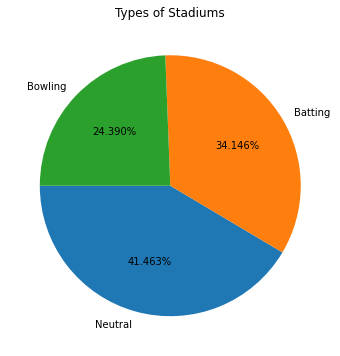

In [ ]:
# Comparing how many Batting favoured, Bowling favoured and Neutral stadiums are there.
cnt = dict(Counter(stadium_type_df["Favoured Stadium Type"]))
plt.figure(figsize=(6,6))
plt.title("Types of Stadiums")
plt.pie(list(cnt.values()),labels=list(cnt.keys()),autopct='%1.3f%%',startangle = 180);

### Q. Does giving more extra runs effects in the result of the game?

Let's check this question by comparing those teams who have won by giving more extra runs and those who lost by the same.

In [ ]:
# At first let us remove all those match with results as NO result or tie i.e consider only matches with Normal result
considered = ipl_matches_df[ipl_matches_df.result == "normal"]
considered.reset_index(inplace = True)
# Lets make a dictionary of ids of matches to winner of match:
ids_di = dict()
for i in range(len(considered)):
    ids_di[considered["id"][i]] = considered["winner"][i]
extra_more_loss = 0 #Teams for which giving more extra resulted in their defeat
extra_more_won = 0 # Teams who won even after giving more extras
for i in ids_di.keys():
    di = dict()
    match = deliveries_df[deliveries_df.match_id == i]
    inning1 = match[match.inning == 1]
    inning2 = match[match.inning == 2]
    di[inning1.extra_runs.sum()] = inning1.bowling_team.unique()[0]
    di[inning2.extra_runs.sum()] = inning2.bowling_team.unique()[0]
    # We need to skip those teams who gave equal extra runs
    if len(di) == 1:
        continue
    ma = max(di.keys()) # Getting the teams who gave more extra run
    # Now lets check if the team loose after giving more extra runs
    if di[ma] != ids_di[i]:
        # Number of teams for who giving more extra run cost the match
        extra_more_loss +=1
    else:
        #Number of teams who won even after giving more extra runs
        extra_more_won+= 1

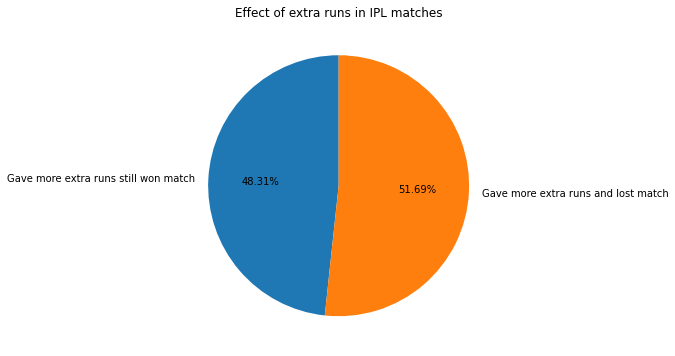

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Effect of extra runs in IPL matches")
plt.pie((extra_more_won , extra_more_loss),labels=("Gave more extra runs still won match","Gave more extra runs and lost match"),autopct='%1.2f%%',startangle = 90);

In the above chart we can see approx 52% matches depended on extra runs i.e. In 52% matches of all match ever happened in IPL the teams which gave extra runs lost the match. This shows giving more extra runs can decide the result of the match, so a team must always prevent from giving extra runs.

### Q. Who are the top 5 Umpires to look over matches in IPL?

Let us wrap up our Analyzation by answering the last question about Umpires. As umpires play a great a role in cricket matches we will look at the top 5 umpires who umpired in IPL till now.

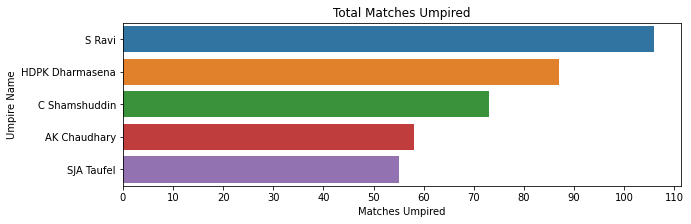

In [ ]:
umpires_count = dict(Counter(ipl_matches_df.umpire1)+Counter(ipl_matches_df.umpire2))
umpire_df = pd.DataFrame(columns = {"Umpire Name","Matches Umpired"})
for umpire in umpires_count:
    umpire_df = umpire_df.append({"Umpire Name":umpire,"Matches Umpired":umpires_count[umpire]},ignore_index = True)
umpire_df.sort_values("Matches Umpired",inplace=True,ascending = False)
umpire_df
plt.figure(figsize= (10,3))
plt.title("Total Matches Umpired")
plt.xticks(range(0,120,10))
sns.barplot(x=umpire_df["Matches Umpired"],y= umpire_df["Umpire Name"].head(5));

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
>
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
>
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml




In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'